In [5]:
import pandas as pd
from common.database import Database
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
Database.initialize()
collection = "spotify_youtube_collection"
pd.set_option('display.float_format', lambda x: '%.2f' % x)

##### Get data from Mongodb and load it into pandas datafram

In [7]:
data = Database.find(collection=collection, query={})


In [8]:
records_df = pd.DataFrame(list(data))

In [9]:
records_df.head(3)

_id  ID    Artist  \
0  64d3fd5ea57157080bfbad21   0  Gorillaz   
1  64d3fd5ea57157080bfbad22   1  Gorillaz   
2  64d3fd5ea57157080bfbad23   2  Gorillaz   

                                         Url_spotify  \
0  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   

                                    Uri  Danceability  Energy  ...  Valence  \
0  spotify:track:0d28khcov6AiegSCpG5TuT          0.82    0.70  ...     0.77   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG          0.68    0.70  ...     0.85   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU          0.69    0.92  ...     0.55   

   Tempo  Duration_ms                                  Url_youtube  \
0 138.56    222640.00  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  92.76    200173.00  https://www.youtube.com/watch?v=yYDmaexVHic   
2 108.01    215150.00  https://www.youtube.com/watch?v=qJa-VFwPpYA   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz 693555221.00   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz  72011645.00   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz   8435055.00   

       Likes  Comments        Stream  
0 6220896.00 169907.00 1040234854.00  
1 1079128.00  31003.00  310083733.00  
2  282142.00   7399.00   63063467.00  

[3 rows x 26 columns]

##### Understanding dataset

In [10]:
records_df.shape

(20718, 26)

In [11]:
records_df.describe()

ID  Danceability   Energy      Key  Loudness  Speechiness  \
count 20718.00      20716.00 20716.00 20716.00  20716.00     20716.00   
mean  10358.50          0.62     0.64     5.30     -7.67         0.10   
std    5980.92          0.17     0.21     3.58      4.63         0.11   
min       0.00          0.00     0.00     0.00    -46.25         0.00   
25%    5179.25          0.52     0.51     2.00     -8.86         0.04   
50%   10358.50          0.64     0.67     5.00     -6.54         0.05   
75%   15537.75          0.74     0.80     8.00     -4.93         0.10   
max   20717.00          0.97     1.00    11.00      0.92         0.96   

       Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
count      20716.00          20716.00  20716.00 20716.00 20716.00   
mean           0.29              0.06      0.19     0.53   120.64   
std            0.29              0.19      0.17     0.25    29.58   
min            0.00              0.00      0.01     0.00     0.00   
25%            0.04              0.00      0.09     0.34    97.00   
50%            0.19              0.00      0.12     0.54   119.97   
75%            0.48              0.00      0.24     0.73   139.94   
max            1.00              1.00      1.00     0.99   243.37   

       Duration_ms         Views       Likes    Comments        Stream  
count     20716.00      20248.00    20177.00    20149.00      20142.00  
mean     224717.58   93937821.13   663341.06    27518.99  135942190.38  
std      124790.54  274644322.00  1789324.25   193234.69  244132077.82  
min       30985.00          0.00        0.00        0.00       6574.00  
25%      180009.50    1826001.50    21581.00      509.00   17674864.25  
50%      213284.50   14501095.00   124481.00     3277.00   49682981.50  
75%      252443.00   70399749.00   522148.00    14360.00  138358065.25  
max     4676058.00 8079649362.00 50788652.00 16083138.00 3386520288.00

In [12]:
records_df = records_df.replace(np.nan, 0)

In [13]:
records_df.columns

Index(['_id', 'ID', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Stream'],
      dtype='object')

In [14]:
records_df['Artist'].unique()

array(['Gorillaz', 'Red Hot Chili Peppers', '50 Cent', ..., 'LE SSERAFIM',
       'ThxSoMch', 'SICK LEGEND'], dtype=object)

In [15]:
records_grouped_by_artists_df = records_df.set_index('_id').groupby('Artist').agg(
        Total_views=('Views',sum),
        Total_likes=('Likes',sum),
        Total_comments=('Comments', sum),
        Total_duration=('Duration_ms',sum)
    )

In [16]:
records_grouped_by_artists_df.reset_index(inplace=True)

In [17]:
records_grouped_by_artists_df.head(3)

Artist   Total_views  Total_likes  Total_comments  Total_duration
0         $NOT  110784903.00   2747163.00        81497.00      1617230.00
1  $uicideboy$  334135108.00   3576621.00        65127.00      1640430.00
2     (G)I-DLE 1754953941.00  24462963.00      1456246.00      1891081.00

##### function got get top 5 artists based on specific parameters

In [18]:
def get_top_5_artists(attr):
    top_5_artists = records_grouped_by_artists_df[['Artist',attr]]
    top_5_artists = top_5_artists.sort_values(by=attr, ascending=False)
    top_5_artists = top_5_artists[:5]
    return top_5_artists

##### Top 5 artists with the most views

In [19]:
top_5_artists = get_top_5_artists('Total_views')

[Text(0.5, 1.0, 'Top 5 Artists with Most Views')]

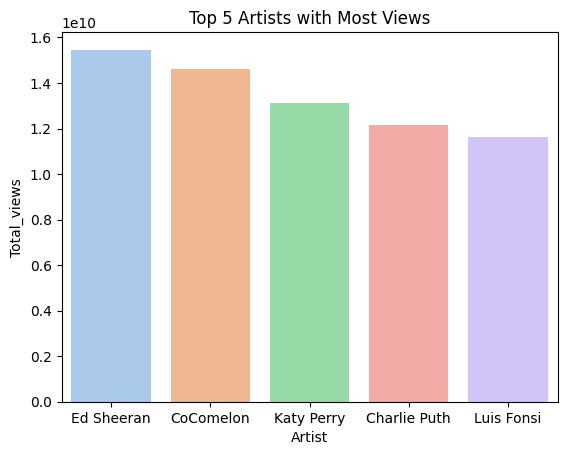

In [20]:
sns.barplot(top_5_artists, x="Artist", y="Total_views", palette='pastel').set(title='Top 5 Artists with Most Views')

##### Top 5 artists with most likes

In [21]:
top_5_artists = get_top_5_artists('Total_likes')

[Text(0.5, 1.0, 'Top 5 Artists with Most Likes')]

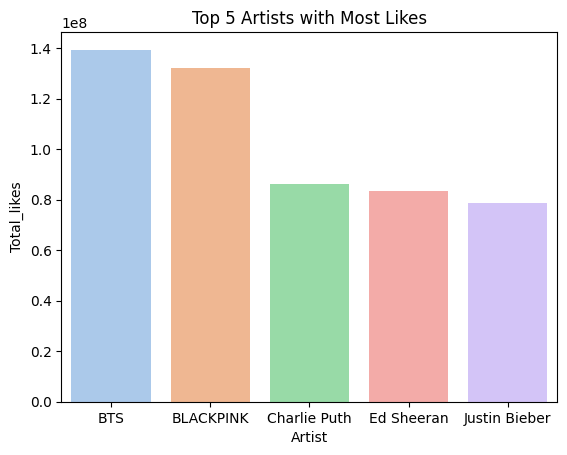

In [22]:
sns.barplot(top_5_artists, x="Artist", y="Total_likes", palette='pastel').set(title='Top 5 Artists with Most Likes')

##### Top 5 artists with most comments

In [23]:
top_5_artists = get_top_5_artists('Total_comments')

[Text(0.5, 1.0, 'Top 5 Artists with Most Comments')]

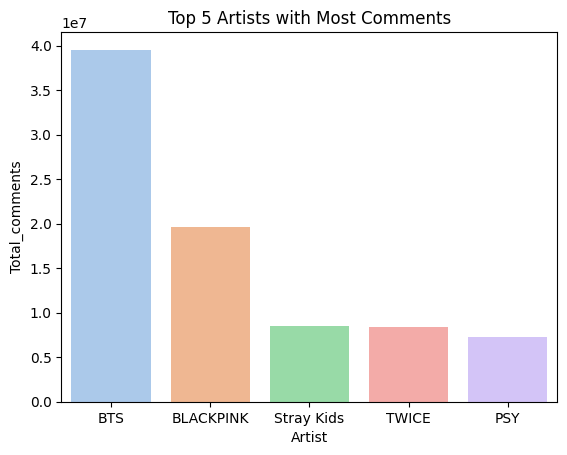

In [24]:
sns.barplot(top_5_artists, x="Artist", y="Total_comments", palette='pastel').set(title='Top 5 Artists with Most Comments')

##### Visualizing top 50 Artists with most views

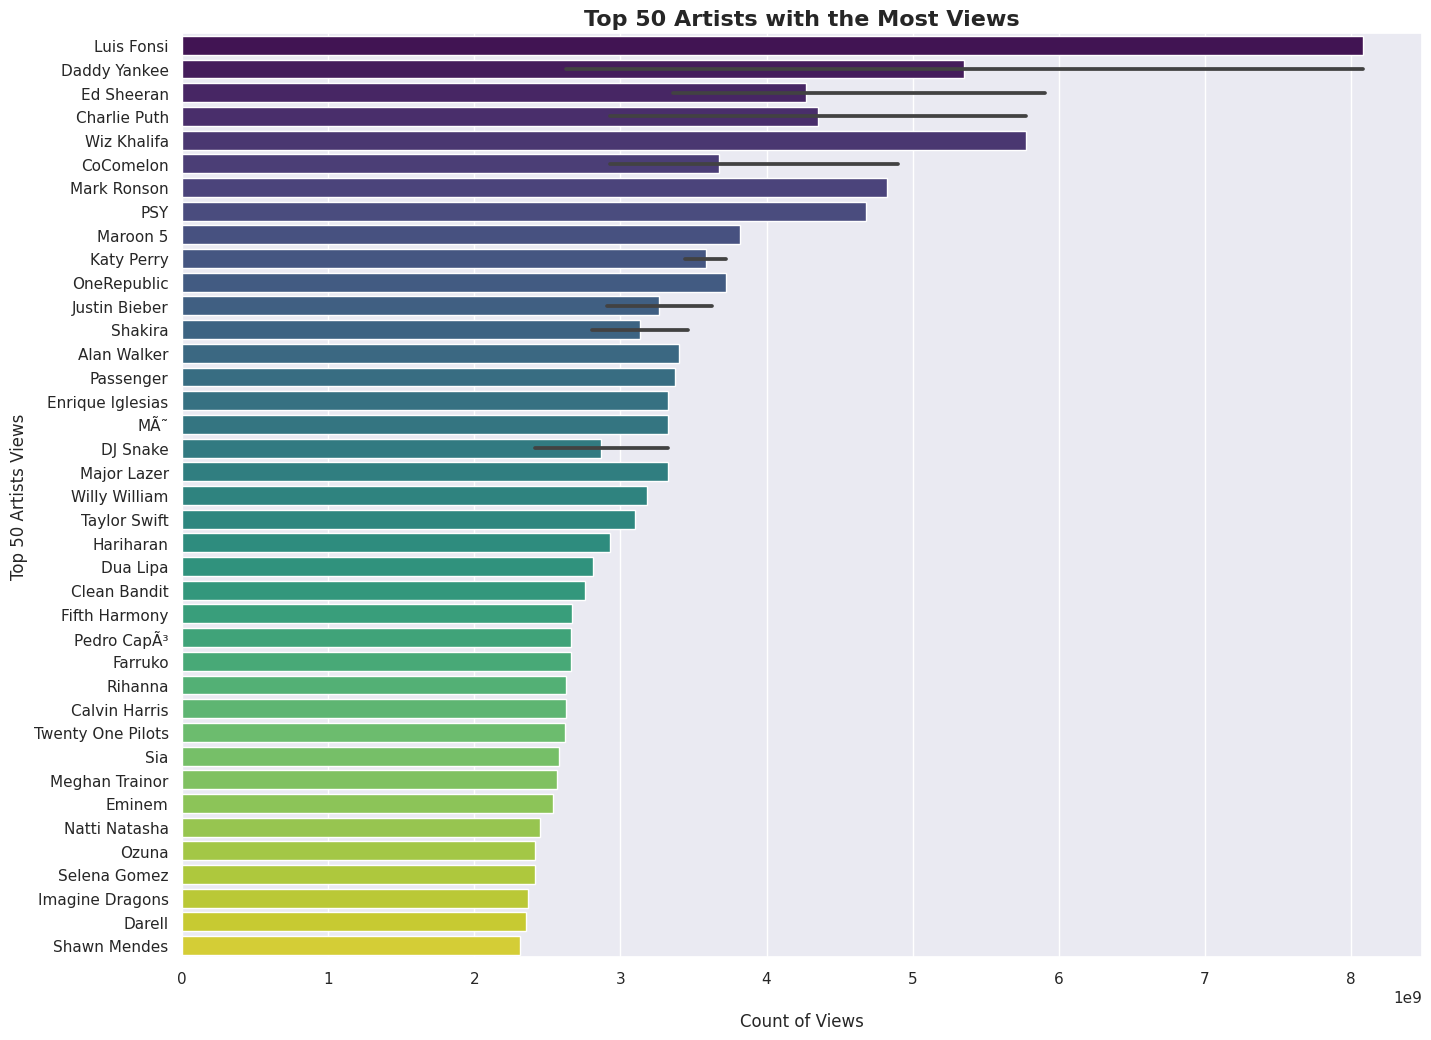

In [29]:
top_fifty = records_df.nlargest(50, 'Views')
plt.figure(figsize=(16, 12))
sns.barplot(x='Views', y='Artist', data=top_fifty, palette='viridis')
plt.xlabel('\nCount of Views',fontsize=12)
plt.ylabel('Top 50 Artists Views', fontsize=12)
plt.title('Top 50 Artists with the Most Views', fontsize=16,weight='bold')
plt.show()

#### Correlation heatmap based on various parameters
##### 'Views', 'Likes', 'Comments', 'Stream','Energy','Key', 'Loudness', 'Speechiness','Acousticness'

In [35]:
records_numerical_df = records_df[['Views', 'Likes',
       'Comments', 'Stream','Energy','Key', 'Loudness', 'Speechiness',
       'Acousticness']]

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
correlation_matrix = records_numerical_df.corr()
sns.heatmap(correlation_matrix, cmap="RdPu", annot=True, fmt=".2f", ax=ax)
plt.title("Correlation Heatmap", fontsize=20, weight='bold')
plt.tight_layout()

cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0'])

plt.xticks(rotation=45, ha="right")
plt.show()